<a href="https://colab.research.google.com/github/rizzaesh/machine-learning-sklearn/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Linear Models

In [1]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet

In [9]:
reg = linear_model.LinearRegression() #define the model
reg.fit([[0, 0],[1, 1],[2, 2]], [0, 1, 2]) #fit the model
reg.coef_,reg.intercept_ #this is the W where we say Y = W*X + b

(array([0.5, 0.5]), 1.1102230246251565e-16)

The RidgeClassifier can be significantly faster than e.g. LogisticRegression with a high number of classes because it can compute the projection matrix 
 only once.

This classifier is sometimes referred to as a Least Squares Support Vector Machines with a linear kernel.

In [3]:
reg = linear_model.Ridge(alpha=0.9)
reg.fit([[0,0],[1,1],[2,2]],[0,0.1,.2])

reg.coef_,reg.intercept_ # first the W and the second is the b

(array([0.04081633, 0.04081633]), 0.018367346938775522)

In [20]:
[10,11,13] + np.arange(0, 10)[:,np.newaxis] #this is good

array([[10, 11, 13],
       [11, 12, 14],
       [12, 13, 15],
       [13, 14, 16],
       [14, 15, 17],
       [15, 16, 18],
       [16, 17, 19],
       [17, 18, 20],
       [18, 19, 21],
       [19, 20, 22]])

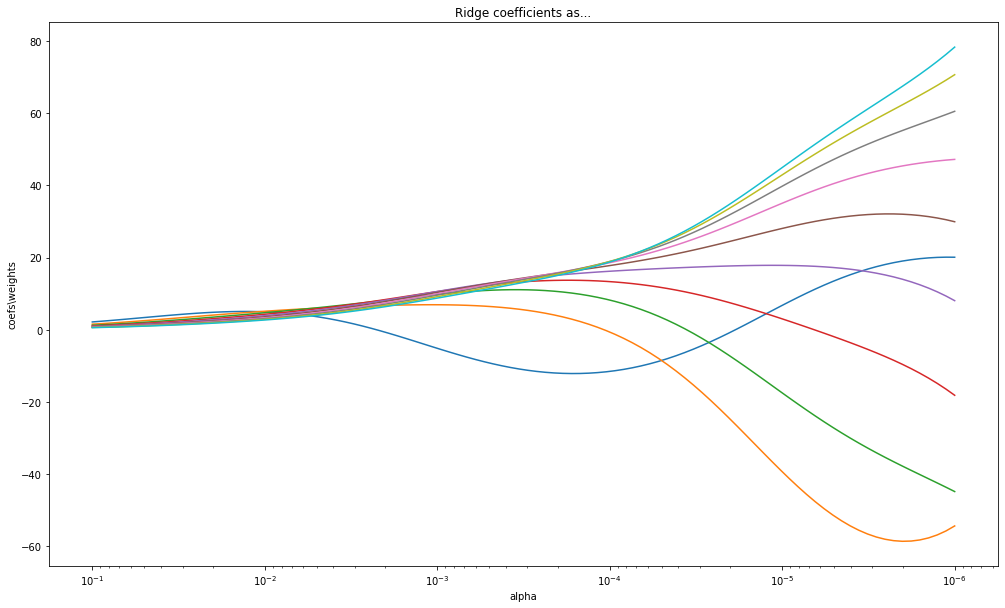

In [25]:
# from numpy.core.fromnumeric import size
#example of Ridge
# what is the X ?
X = 0.1 / (np.arange(1, 11) + np.arange(0, 10)[:,np.newaxis])
y = np.ones(10)
#--------------------------------------
n_alphas = 100
alphas = np.logspace(-6, -1, n_alphas) # find number between 1**a and 1**b in log space
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#---------------------------------------
plt.figure(figsize = (17,10)) #you must make this first
#before doing plt.blah
ax = plt.gca()
# plt.figure(figsize = (10,10))
############ OPs
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis

plt.xlabel("alpha")
plt.ylabel("coefs\weights")
plt.title("Ridge coefficients as...")
plt.axis("tight")
plt.show()

In [28]:
# regularization with Lasso --> ridge/n_sample
lasso = linear_model.Lasso(alpha = .1)
lasso.fit([[0,0],[1,1],[2,2]],[0,1,2])
reg.predict([[0.2,1]])

array([0.6])

Lasso(alpha=0.1)
r^2 on test data : 0.658064
ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


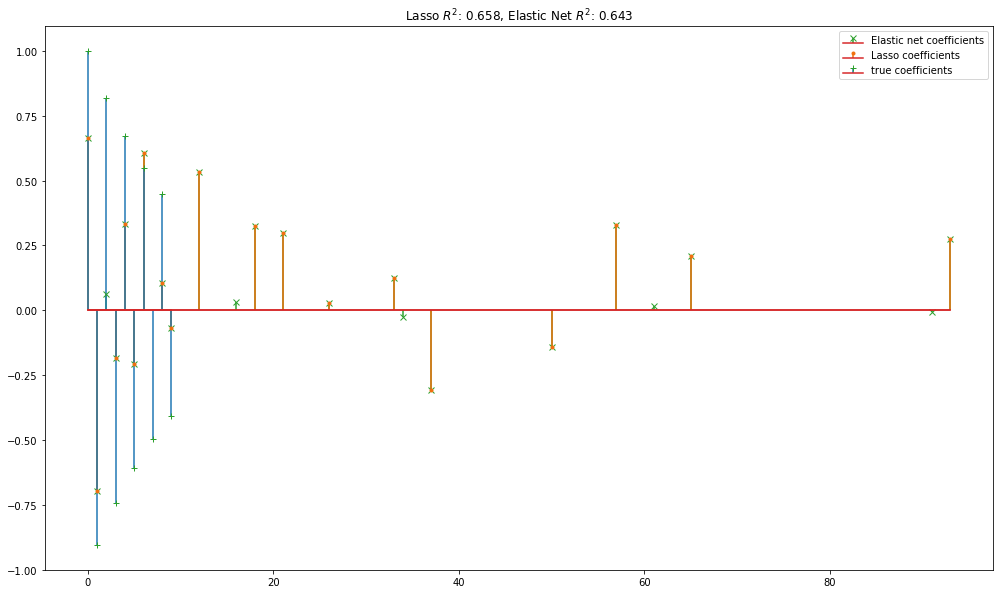

In [82]:
import sklearn
#lasso example
np.random.seed(42)

n_sample, n_feature = 50, 100
X = np.random.randn(n_sample, n_feature)

idx = np.arange(n_feature)
coef = (-1) ** idx * np.exp(-idx / 10) #we define W

coef[10:] = 0 #sparse the matrix

y = np.dot(X,coef)
# add noise
y += 0.01 * np.random.normal(size = n_sample)

n_sample = X.shape[0]
X_train, y_train = X[: n_sample //2],y[: n_sample //2] #from 0 to a
X_test, y_test = X[n_sample //2 :],y[n_sample //2 :] #from a+1 to -1


# lasso
alpha = 0.1
lasso = linear_model.Lasso(alpha = alpha)
y_pred_lasso = lasso.fit(X_train,y_train).predict(X_test)

r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# Elasticnet
enet = ElasticNet(alpha=alpha, l1_ratio = 0.7)
y_pred_enet = enet.fit(X_train,y_train).predict(X_test)
r2_score_enet = r2_score(y_test,y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

# plotting

plt.figure(figsize = (17,10))

m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#2ca02c")

m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    enet.coef_[lasso.coef_ != 0],
    markerfmt = '.',
    label = 'Lasso coefficients',
    use_line_collection = True,
)
plt.setp([m,s],color = "#f1700e")

plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label = "true coefficients",
    markerfmt = "+",
    use_line_collection=True,
)

plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso,r2_score_enet)
)

plt.show()

# finally
# in this section we evaluate that the lasso and enet
# with different amount of alpha how can find the initional
# coef. so what we can see is that this models can hardly (50%)
# find the real Ws and the ys.

In [99]:
import sklearn
sklearn.set_config(display="diagram")

In [102]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
n_sample = X.shape[0]
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Scikit-learn provides an estimator called LinearLarsIC that uses either Akaike’s information criterion (AIC) or the Bayesian information criterion (BIC) to select the best model. Before fitting this model, we will scale the dataset.

In the following, we are going to fit two models to compare the values reported by AIC and BIC.

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

In [117]:
lasso_lars_ic = make_pipeline(
    StandardScaler(),LassoLarsIC(criterion="aic", normalize=False)
).fit(X,y)

In [116]:
data = [[0, 0], [0, 0], [1, 6], [1, 1]]
scal = StandardScaler()
scal.fit(data)
scal.mean_

array([0.5 , 1.75])

In [112]:
lasso_lars_ic

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassolarsic', LassoLarsIC(normalize=False))])

In [126]:
lasso_lars_ic[-1].criterion_

array([5234.85025184, 5203.24752401, 4933.10780999, 4880.13900455,
       4831.18491548, 4823.08577005, 4823.99885911, 4818.64065863,
       4822.98562417, 4828.78933255, 4827.28476075, 4827.21254634,
       4833.03709566])

In [105]:
def zou_et_al_criterion_rescaling(criterion, n_samples, noise_variance):
    """Rescale the information criterion to follow the definition of Zou et al."""
    return criterion - n_samples * np.log(2 * np.pi * noise_variance) - n_samples

In [120]:
aic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_sample,
    lasso_lars_ic[-1].noise_variance_,
)

inedx_alpha_path_aic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]

In [122]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)

bic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_sample,
    lasso_lars_ic[-1].noise_variance_,
)

index_alpha_path_bic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]

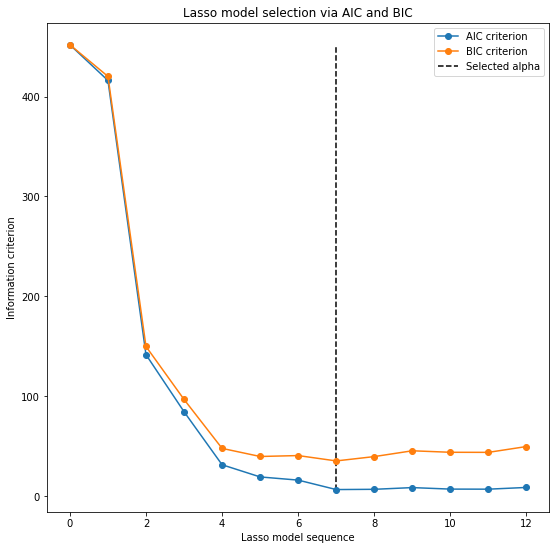

In [125]:
plt.figure(figsize=(9,9))
plt.plot(aic_criterion, color="tab:blue", marker="o", label="AIC criterion")
plt.plot(bic_criterion, color="tab:orange", marker="o", label="BIC criterion")
plt.vlines(
    index_alpha_path_bic,
    aic_criterion.min(),
    aic_criterion.max(),
    color="black",
    linestyle="--",
    label="Selected alpha",
)
plt.legend()
plt.ylabel("Information criterion")
plt.xlabel("Lasso model sequence")
_ = plt.title("Lasso model selection via AIC and BIC")